## Santander Customer Satisfaction

### Kaggle: https://www.kaggle.com/c/santander-customer-satisfaction/data

In [1]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Carregando o dataset
traindata = pd.read_csv('Santander_sample.csv')

In [149]:
#Visualizando o shape do dataset
print(traindata.shape)

(10000, 371)


In [150]:
#Visualizando as 5 primeiras linhas do dataset
traindata.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [151]:
#Resumo estatístico do dataset
traindata.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,10037.371400,-697.290500,33.286200,103.577532,74.301786,127.464021,6.700176,11.824926,0.609000,0.924000,...,3.377190,1.270416,3.806706,3.011112,15.324084,2.714991,27.227514,20.009280,1.169056e+05,0.038800
std,5814.748024,26449.620836,12.946129,2373.057243,342.390527,579.622179,149.285046,239.343336,28.580077,41.718824,...,210.980982,80.382604,221.976668,168.737633,600.931851,196.281397,874.238934,649.869051,1.589653e+05,0.193128
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.000000
25%,5011.500000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.767771e+04,0.000000
50%,9987.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.068753e+05,0.000000
75%,15026.250000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201209e+05,0.000000
max,20074.000000,235.000000,102.000000,210000.000000,7904.220000,15182.460000,7904.220000,11073.570000,1800.000000,3000.000000,...,15265.950000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,9.055272e+06,1.000000


In [152]:
#Visualizando o tipo de dado
traindata.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [153]:
#Distribuição do target
traindata.groupby('TARGET').size()

TARGET
0    9612
1     388
dtype: int64

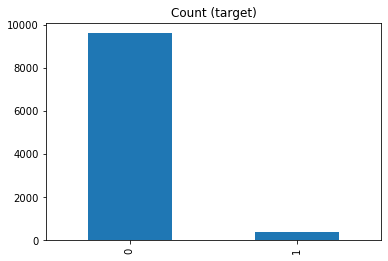

In [154]:
target_count = traindata.TARGET.value_counts()
target_count.plot(kind='bar', title='Count (target)');

In [155]:
#Verificando a correlação entre as variáveis
traindata.corr(method = 'pearson')

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.002846,-0.002679,0.025045,0.007413,0.003251,0.002660,-0.005608,0.009758,0.010021,...,-0.013220,-0.008712,-0.011174,-0.010427,-0.010669,-0.007283,-0.008595,-0.008657,-0.007914,-0.013538
var3,-0.002846,1.000000,-0.007258,0.001157,0.005783,0.005883,0.001211,0.001369,0.000563,0.000586,...,0.000434,0.000442,0.000464,0.000485,0.000709,0.000411,0.000849,0.000841,-0.000066,0.005312
var15,-0.002679,-0.007258,1.000000,0.033298,0.112041,0.117091,0.060546,0.071889,0.015706,0.013459,...,0.022834,0.021089,0.023337,0.023729,0.026193,0.018280,0.030226,0.029057,0.002010,0.110678
imp_ent_var16_ult1,0.025045,0.001157,0.033298,1.000000,0.022729,0.019085,0.011131,0.008149,0.003582,0.008125,...,-0.000699,-0.000690,-0.000645,-0.000643,-0.001113,-0.000604,-0.001359,-0.001344,0.000796,0.000212
imp_op_var39_comer_ult1,0.007413,0.005783,0.112041,0.022729,1.000000,0.877528,0.475310,0.421565,0.074839,0.100495,...,0.015432,0.039172,0.022054,0.029143,0.006858,0.000325,0.004799,0.003938,0.002213,0.026247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.007283,0.000411,0.018280,-0.000604,0.000325,0.000958,-0.000621,-0.000683,-0.000295,-0.000306,...,-0.000221,-0.000219,-0.000237,-0.000247,0.810665,1.000000,0.595163,0.617328,0.015887,-0.002779
saldo_medio_var44_ult1,-0.008595,0.000849,0.030226,-0.001359,0.004799,0.005448,-0.001398,-0.001539,-0.000664,-0.000690,...,-0.000499,-0.000492,-0.000534,-0.000556,0.902203,0.595163,1.000000,0.991274,0.006543,-0.006258
saldo_medio_var44_ult3,-0.008657,0.000841,0.029057,-0.001344,0.003938,0.004291,-0.001382,-0.001521,-0.000656,-0.000682,...,-0.000493,-0.000487,-0.000528,-0.000549,0.919532,0.617328,0.991274,1.000000,0.007447,-0.006186
var38,-0.007914,-0.000066,0.002010,0.000796,0.002213,-0.000029,0.005327,0.002510,-0.002082,-0.002140,...,0.005719,0.001661,0.005284,0.004938,0.011091,0.015887,0.006543,0.007447,1.000000,-0.027689


In [156]:
# Removendo colunas constantes, com desvio padrão = 0
remove = []
for col in traindata.columns:
    if traindata[col].std() == 0:
        remove.append(col)

print(remove)

['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 

In [157]:
traindata.drop(remove, axis=1, inplace=True)
traindata.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [158]:
# Removendo colunas duplicadas
removeDup = []
c = traindata.columns
for i in range(len(c)-1):
    v = traindata[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,traindata[c[j]].values):
            removeDup.append(c[j])
            
print(removeDup)

['ind_var40_0', 'ind_var40', 'ind_var39', 'ind_var29_0', 'ind_var29', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var37', 'ind_var39', 'ind_var44', 'num_var40_0', 'num_var40', 'num_var39', 'num_var29_0', 'num_var29', 'num_var26', 'num_var25', 'num_var32', 'num_var37', 'num_var39', 'num_var44', 'saldo_var40', 'saldo_var29', 'delta_num_aport_var17_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_venta_var44_1y3']


In [160]:
traindata.drop(removeDup, axis=1, inplace=True)
traindata.shape

(10000, 259)

In [161]:
traindata.drop('ID', axis=1, inplace=True)

In [162]:
traindata.shape

(10000, 258)

In [163]:
array = traindata.values

In [198]:
#Normalizando os dados

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:256]
Y = array[:,257]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
rescaledX[0:5,:]

array([[0.99976705, 0.18556701, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976705, 0.29896907, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976705, 0.18556701, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976705, 0.32989691, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976705, 0.35051546, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [199]:
#Feature selection

#Função para seleção de variáveis
best_var = SelectKBest(score_func = chi2, k = 70)

#Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(rescaledX, Y)

#Reduz X para os recursos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)


Número original de features: 256

Número reduzido de features: 70

Features (Variáveis Selecionadas): 

 [[   23.       0.       0.   ...     0.       0.       0.  ]
 [   34.       0.       0.   ...   300.     300.     240.75]
 [   23.       0.       0.   ...     0.       0.       0.  ]
 ...
 [   37.       0.       0.   ...     0.       0.       0.  ]
 [   24.       0.       0.   ...     0.       0.       0.  ]
 [   40.       0.       0.   ... 18000.   18000.   13800.  ]]


In [200]:
# Separando o array em componentes de input e output
X = features[:] #usando as features selecionadas
Y = array[:,257]

# Definindo os valores para o número de folds
num_folds = 10
seed = 10

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

C:\Users\juliana.kitaguchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [204]:
# Avaliando o algoritmo KNN
model = KNeighborsClassifier()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 65.176


In [202]:
# Avaliando o algoritmo NaiveBayes
model = GaussianNB()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 73.005


In [203]:
# Avaliando o algoritmo SVM
model = SVC()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 50.840


In [201]:
# Avaliando o algoritmo GradientBoosting
model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 80.219
